Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement transfomers (from versions: none)
ERROR: No matching distribution found for transfomers


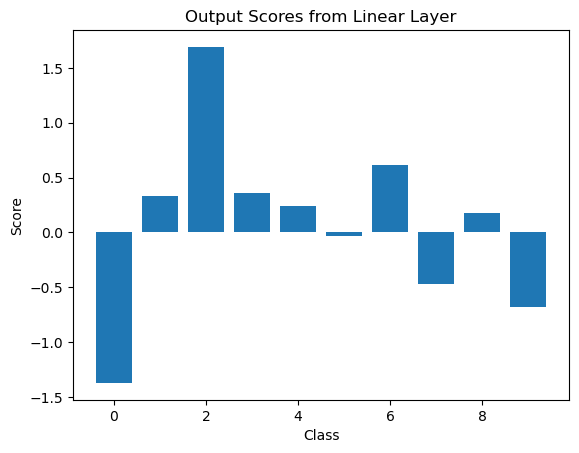

In [3]:
!pip install torch matplotlib transfomers

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create a dummy input tensor to simulate a grayscale image (e.g., 28x28)
# Here we assume it's already flattened
torch_tensor_gray = torch.randn(1, 28 * 28)  # batch size 1, input size 784

# Define the model
model = nn.Linear(in_features=28 * 28, out_features=10)

# Move to CUDA if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
torch_tensor_gray = torch_tensor_gray.to(device)  # This line was broken in your code

# Pass through the model
scores = model(torch_tensor_gray)

# Move to CPU for visualization
scores_cpu = scores.detach().cpu().squeeze()

# Plot the scores as a bar graph
plt.bar(range(10), scores_cpu)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Output Scores from Linear Layer')
plt.show()


In [4]:

transform = transforms.toImage()
image_tensor = transform(np.array)

print(image_tensor.shape)

print(image_tensor.permute(1,2,0).shape)


plt.imshow(image_tensor)

plt.imshow(image_tensor.permute(1,2,0))

NameError: name 'transforms' is not defined

In [ ]:
import torch

w1 = torch.tensor([4.0], requires_grad=True)

x1 = torch.tensor([5.0], requires_grad=False)

y = torch.tensor([6.0], requires_grad=False)

L = torch.abs(w1 * x1 - y)

print(f"1 = {z.item()}, requires_grad = {L.requires_grad}")

L.backward()

print(f"d1/dw1 = {w1.grad}")

In [ ]:
#Numerical Stability example

original_values = torch.tensor([255,204,170], dtype=torch.uint8)
print(f"original values: {original_values}")

float_values = original_values.float() / 255
print(f"Scaled values: {float_values}")

print(f"original exp: {torch.exp(original_values)}")
print(f"Scaled exp: {torch.exp(float_values)}")

In [ ]:
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDType(torch.float32, scale=True)])

image_tensor = transform(pil_image)

print(image_tensor.max(), image_tensor.min())

In [ ]:
import torch.nn as nn 

l_h_layer = nn.Linear(in_features=3, out_features=4, bias=False)
h_o_layer = nn.Linear(in_features=4, out_features=1, bias=False)

model = nn.Sequential(
        l_h_layer,
        nn.ReLU(),
        h_o_layer,
)

input_data = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)


prediction = model(input_data)

target = torch.tensor([11.], dtype=torch.float32)

loss_function = nn.L1loss()


loss_value = loss_function(target, prediction)

In [ ]:
import torch
import torch.nn as nn

layer = nn.Linear(in_features=4, out_features=1, bias=True)

for name, param in layer.named_parameters():
    print(f'{name}: {param:shape}')
    print(param)

x = torch.randn(5, 4)
output = layer(x)

print(output.shape)